# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [28]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from webdriver_manager.chrome import ChromeDriverManager

In [5]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
def geturl(url):
    browser.visit(url)

In [12]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
geturl('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [13]:
# Create a Beautiful Soup Object
html = browser.html
soup_object = soup(html, 'html.parser')
select_article=soup_object.select('div.list_text')

In [14]:
# Extract all rows of data
all_text=soup_object.find_all()
all_text

[<html lang="en"><head>
 <meta charset="utf-8"/>
 <meta content="width=device-width, initial-scale=1" name="viewport"/>
 <meta content="" name="description"/>
 <title>Mars Temperature Data</title>
 <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
 <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
 <main>
 <div class="container py-4">
 <header class="pb-3 mb-4 border-bottom">
 <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
 <span class="fs-4">Mission To Mars</span>
 </a>
 </header>
 <div class="p-5 mb-4 bg-light rounded-3">
 <div class="container-fluid py-5">
 <h1 class="display-5 fw-bold">Mars Temperature Data</h1>
 <p class="col-md-8 fs-4">This is Mars data.</p>
 <table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [23]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
mars_df=pd.read_html(url)[0]

# Confirm DataFrame was created successfully
mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [24]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [25]:
# Change data types for data analysis
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])

In [26]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [33]:
# 1. How many months are there on Mars?
months = pd.unique(mars_df['month'])
months

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [46]:
# 2. How many Martian days' worth of data are there?
days_of_data = mars_df['terrestrial_date'].count()
print(f"There are {days_of_data} Martian days worth of data")

There are 1867 Martian days worth of data


In [62]:
# 3. What is the average low temperature by month?
avg_low_temp=mars_df.groupby('month',as_index=False).mean()
avg_low_temp

low_temperature_df=avg_low_temp['min_temp']
low_temperature_df

0    -77.160920
1    -79.932584
2    -83.307292
3    -82.747423
4    -79.308725
5    -75.299320
6    -72.281690
7    -68.382979
8    -69.171642
9    -71.982143
10   -71.985507
11   -74.451807
Name: min_temp, dtype: float64

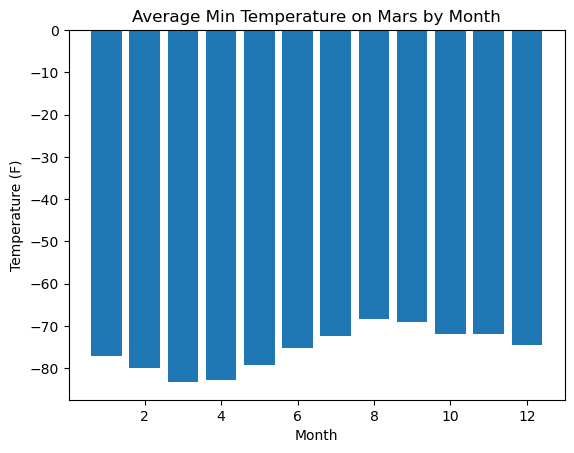

In [84]:
# Plot the average temperature by month
plt.bar(avg_low_temp['month'],avg_low_temp['min_temp'])

plt.title(f"Average Min Temperature on Mars by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (F)")
plt.show()

In [71]:
# Identify the coldest and hottest months in Curiosity's location
hottest_month=avg_low_temp.sort_values(['min_temp'],ascending=False)
hottest_month_is=coldest_month.head(1)
hottest_month_is

,month,id,sol,ls,min_temp,pressure
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787


In [72]:
coldest_month=avg_low_temp.sort_values(['min_temp'],ascending=True)
coldest_month_is=coldest_month.head(1)
coldest_month_is

,month,id,sol,ls,min_temp,pressure
2,3,1132.697917,1204.40625,75.010417,-83.307292,877.322917


In [65]:
# 4. Average pressure by Martian month
avg_pressure = mars_df.groupby('month',as_index=False).mean()
avg_pressure

pressure=avg_pressure['pressure']
pressure

0     862.488506
1     889.455056
2     877.322917
3     806.329897
4     748.557047
5     745.054422
6     795.105634
7     873.829787
8     913.305970
9     887.312500
10    857.014493
11    842.156627
Name: pressure, dtype: float64

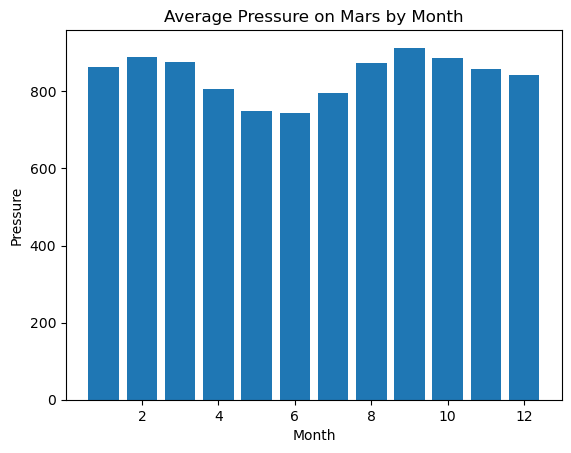

In [66]:
# Plot the average pressure by month
plt.bar(avg_pressure['month'],avg_pressure['pressure'])

plt.title(f"Average Pressure on Mars by Month")
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.show()

In [86]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#number of martian years..one martian years is 668 martian days
martian_days=mars_df['sol'].max()-mars_df['sol'].min()
martian_years=martian_days/668

#number of earth days total
days_of_data = mars_df['terrestrial_date'].count()

#Curiosity was on mars for <martian_years> number of martian years or <days of data> earth days 

earth_days_per_martian_yaer=days_of_data/martian_years
earth_days_per_martian_yaer

634.039654295882

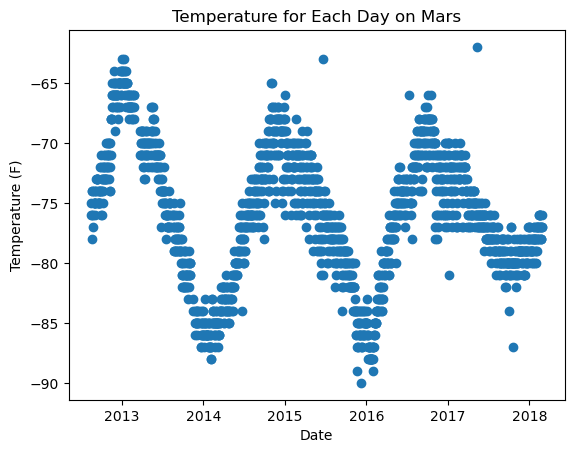

<Figure size 2000x500 with 0 Axes>

In [83]:
plt.scatter(mars_df['terrestrial_date'],mars_df['min_temp'])

plt.title(f"Temperature for Each Day on Mars")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.figure(figsize = (20,5))
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [88]:
# Write the data to a CSV
file_name = './Data/mars_data.csv'
mars_df.to_csv(file_name, index=False)

In [89]:
browser.quit()